In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [37]:
iris_dataset = load_iris()
data = iris_dataset['data']

data1 = data.copy()
data1 = np.delete(data1, 1, axis=1)
cols_1 = [x for i , x in enumerate(iris_dataset['feature_names']) if i!=1]
iris_dataset_1 = pd.DataFrame(data1, columns=cols_1)

data2 = data.copy()
data2 = np.delete(data2, 0, axis=1)
cols_2 = iris_dataset['feature_names'][1:]
iris_dataset_2 = pd.DataFrame(data2, columns=cols_1)

In [40]:
from mpl_toolkits import mplot3d
import  matplotlib.pyplot as plt

**For iris_dataset_1:**

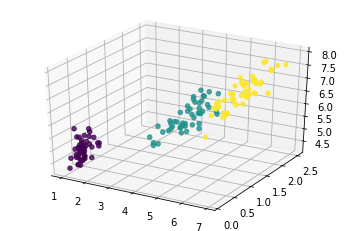

In [69]:
ax = plt.axes(projection='3d')

zdata = iris_dataset_1[iris_dataset_1.columns[0]]
xdata = iris_dataset_1[iris_dataset_1.columns[1]]
ydata = iris_dataset_1[iris_dataset_1.columns[2]]

ax.scatter3D(xdata, ydata, zdata, alpha=0.8, c=iris_dataset.target)

**For iris_dataset_2:**

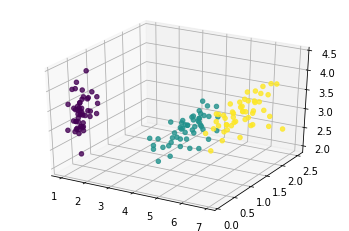

In [67]:
ax = plt.axes(projection='3d')

zdata = iris_dataset_2[iris_dataset_2.columns[0]]
xdata = iris_dataset_2[iris_dataset_2.columns[1]]
ydata = iris_dataset_2[iris_dataset_2.columns[2]]

ax.scatter3D(xdata, ydata, zdata, alpha=0.8, c=iris_dataset.target)

Видим, что один класс явно отличается от других двух, да и между этими двумя граница выражена более или менее четко.

In [95]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data1, iris_dataset['target'],
                                                            test_size=0.2, random_state=17)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data2, iris_dataset['target'],
                                                            test_size=0.2, random_state=17)

print(f'X_train_1 shape: {X_train_1.shape}, y_train_1 shape: {y_train_1.shape}.\n'
      f'X_test_1 shape: {X_test_1.shape}, y_test_1 shape: {y_test_1.shape}.')

X_train_1 shape: (120, 3), y_train_1 shape: (120,).
X_test_1 shape: (30, 3), y_test_1 shape: (30,).


In [100]:
knn_1 = KNeighborsClassifier()
knn_model_1 = knn_1.fit(X_train_1, y_train_1)
knn_pred_1 = knn_model_1.predict(X_test_1)

knn_2 = KNeighborsClassifier()
knn_model_2 = knn_1.fit(X_train_2, y_train_2)
knn_pred_2 = knn_model_1.predict(X_test_2)

In [101]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy_1 = accuracy_score(y_test_1, knn_pred_1)
accuracy_2 = accuracy_score(y_test_2, knn_pred_2)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9666666666666667, accuracy_2: 0.9666666666666667


Как видим, обе наши модели справились с предсказаниями  на ура).

In [ ]:
print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

In [179]:
n = {}
for _ in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=_)
    knn_model = knn.fit(X_train_1, y_train_1)
    knn_pred = knn_model.predict(X_test_1)
    accuracy = accuracy_score(y_test_1, knn_pred)
    n[_] = accuracy

max_acc = max(n.items(), key=lambda x: x[1])    
bests = [x[0] for x in list(n.items()) if x[1]==max_acc[1]]
print(f"Точность наиболее высока для числа соседей, равного:")
print(*bests)

Точность наиболее высока для числа соседей, равного:
1 2 3 5 11 15
